<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>

# Object detection and localization using YOLO

Faisal Qureshi   
Professor    
Faculty of Science    
Ontario Tech University    
Oshawa ON Canada    
http://vclab.science.ontariotechu.ca

## Copyright information

&copy; Faisal Qureshi

## License

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

## Introduction

The goal of this lab is to learn how to use YOLO ([Redmon et al. 2015](https://arxiv.org/abs/1506.02640)) deep learning framework for object detection and localization.  Specifically, we will use YOLO to detect road signs in [https://www.kaggle.com/datasets/andrewmvd/road-sign-detection](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection).  

YOLO (You Only Look Once) is a real-time object detection algorithm that processes images in a single pass, predicting both bounding boxes and class probabilities (Figure 1). 

<center>
    <img src="yolo-fig-1.png" width="60%">
    <p><strong>Figure 1: </strong>YOLO predicts object classes and their bounding boxes. (Figure from Redmon et al. 2015.  )</p>
</center>

### Convolutional layers extract features

YOLO utilizes a series of convolutional layers to extract features from input images (Figure 2).  It divides the input image into a grid and makes predictions based on the features extracted from each grid cell.  

<center>
    <img src="yolo-architecture.png" width="60%">
    <p><strong>Figure 2: </strong>24 convolutional layers followed by 2 fully connected layers. Alternating 1 × 1
convolutional layers reduce the features space from preceding layers. The convolutional layers are pretrained on the ImageNet classification
task at half the resolution (224 × 224 input image) and then double the resolution for detection. (Figure from Redmon et al. 2015.)</p>
</center>

## Learning outcomes

- Setting up YOLO
- Using YOLO for object detection and localization
- Training YOLO on your dataset(s)

### What to submit

<p style="color: red;">
Go to the end of this notebook to see what you need to submit.
</p>

## Setting up YOLO via commandline

We will use YOLO implementation by [Ultralytics](https://www.ultralytics.com/yolo).  You can get detailed information about how to setup and use YOLO on your machine at [https://docs.ultralytics.com/yolov5/](https://docs.ultralytics.com/yolov5/).  

### Downloading YOLO

~~~bash
$ git clone https://github.com/ultralytics/yolov5.git
~~~

This download YOLO in `yolov5` folder. 

### Setting up the Python environment

~~~bash
$ python3 -m venv venv-yolov5
$ source venv-yolov5/bin/activate
(venv-yolov5) $ pip install -r yolov5/requirements.txt
~~~

### Running YOLO on commandline

#### Performing inference on an image

Use the following command to use YOLO to perform object detection on a image.

~~~bash
(venv-yolov5) $ python detect.py --source data/images/bus.jpg --view
~~~

<center>
    <img src="yolo-on-bus.png" width="40%">
<p><strong>Figure 3</strong> YOLO object detection.</p>
</center>

#### Performing inference on webcam video

Use the following command to use YOLO to perform object detection on the video captured by your webcam.  

~~~bash
(venv-yolov5) $ python detect.py --source 0
~~~

Aside: my laptop has one webcam, whose id is 0.  If only a single webcam is attached to your machine then most likely its id will be 0. 

#### More options

Check out the `detect.py` to see the commandline options available to you.  E.g., it is possible to perform object detection on images stored in a folder, video, etc.  

Check 

~~~bash
(venv-yolov5) $ python detect.py --help
~~~

for a complete list of available commandline options.

## YOLO Variants

YOLO comes in many variants, i.e., different network sizes.  By default the network downloads `yolov5s.pt` model.  You can, however, specify other models.   

<center>
    <img src="yolov5-pre-trained-models.png" width="70%">
    <p><strong>Figure 3</strong>YOLO v5 variants.</p>
</center>

### Example: Tiny YOLO

For example, we can specify to use the tiny YOLO when performing inference as follows:

~~~bash
(venv-yolov5) $ python detect.py --weights yolov5n.pt  --source data/images/bus.jpg
~~~

Note that the program will download the pretrained weights, `yolov5n.pt`, as needed.

## Using YOLO within the Jupyter environment

In the previous examples, we have used YOLO from the commandline.  It is also possible to use YOLO from within the Jupyter environment.

### Install YOLO within the Jupyter environment

In [1]:
%pip install --quiet ultralytics

Note: you may need to restart the kernel to use updated packages.


### Use YOLO in Jupyter Lab

Next, within the Jupyter lab environment you can use YOLO to perform inference.  YOLO downloads the weights as needed.

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 148.2ms
Speed: 5.0ms preprocess, 148.2ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 480)


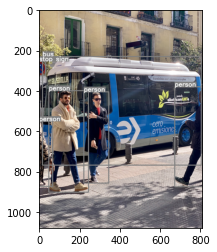

In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.info()
results = model('bus.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

## Training YOLO

Now that we are able to use YOLO for out-of-the-box object detection.  We will turn our attention to training YOLO on our dataset.  We will use the COCO128 to experiment with model training.  

### COCO128 Dataset

Download the COCO128 dataset from [https://www.kaggle.com/datasets/ultralytics/coco128](https://www.kaggle.com/datasets/ultralytics/coco128).  *You may need to create a free [Kaggle](https://www.kaggle.com/) account in order to download this dataset.*  You can also download COCO128 from [here](https://drive.google.com/drive/folders/13yGcWJ5_NAVY7yYlkUxSGhjqIgsu-lY6?usp=sharing).  I am hosting COCO128 for the purposes of this course only.

#### Anatomy of the COCO128

Once downloaded the COCO128 folder looks as shown below.

~~~bash
(venv-yolov5) $ coco128 tree -L 2
.
├── LICENSE
├── README.txt
├── images
│   └── train2017
└── labels
    └── train2017
~~~

**Important:** note that the folder doesnot contain any test images.  This is a toy dataset that is used for the purposes of understanding YOLO training regime.  The same set of images are used for both training and testing.

The dataset consists of two top-level folder: `images` and `labels`:

- `images/train2017` folder contains images;
- `labels/train2017` folder contains text files, one per image, that include annoations.  For example, see Figure 4 below

##### Annotation files

The annotation files contain one object annotation per line using the following format

~~~txt
class-id centerx centery width height
~~~

- `class-id` denotes object class.  This information is found in an accompanying yaml file, e.g., [coco128.yaml](06-object-detection-using-yolo/coco128.yaml), that describes the dataset.  
- The image is resized to have height and width equal to $1$, and `centerx`, `centery`, `width` and `height` is described within the normalized coordinates.

Figure 4 illustrates YOLO annotations:

<center>
    <img src="zidan-annotated.jpeg" width="50%">
    <p><strong>Figure 4</strong> Image 000000000036.jpg</p>    
</center>

#### Example images with annotation files

<center>
    <img src="000000000081.jpg" width="50%">
    <p><strong>Figure 5</strong> Image 000000000081.jpg</p>
</center>

The corresponding annotation file is `000000000081.txt`

~~~txt
4 0.516492 0.469388 0.912516 0.748282
~~~

Similarly, consider Figure 5 below

<center>
    <img src="000000000036.jpg" width="30%">
    <p><strong>Figure 6</strong> Image 000000000036.jpg</p>
</center>

The corresponding annotation file is `000000000036.txt`

~~~txt
25 0.475759 0.414523 0.951518 0.672422
0 0.671279 0.617945 0.645759 0.726859
~~~

### Training on COCO128 dataset

YOLO requires a YAML file that describes the dataset.  See [coco128.yaml](06-object-detection-using-yolo/coco128.yaml) that we will use to train YOLO on COCO128 dataset. `coco128.yaml` file has the following structure.

~~~
path: "/Users/faisal/Dropbox/Teaching/My Courses/2023-2024/Winter 2024/csci-4220u-winter-2024/webpage-source/labs/data/datasets-do-not-upload/coco128" 
train: images/train2017 
val: images/train2017 
test: (optional)
names:
  0: person
  1: bicycle
...
download: download-script-or-data-url (OPTIONAL)
~~~

- `path`: path of the root directory for the dataset.
- `train`: path of the directory containing training images (relative to `path`).  
- `val`: path of the directory containing validation images (relative to `path`).
- `test`: path of the directory containing test images (relative to `path`).  This is *optional*.
- `names`: list of class indices and their names
- `download`: download link or a script.  This is *optional*.

Note that annotations files are loaded from the mirror path(s).  E.g., for training images:
    
- Images are loaded from `images/train2017`; and
- Corresponding annotation files are loaded from `labels/train2017`.

I edited the default `coco128.yaml` file to suit my setup.  I only had to update the path to the root folder for COCO128. 

~~~txt
...
path: "/Users/faisal/Dropbox/Teaching/My Courses/2023-2024/Winter 2024/csci-4220u-winter-2024/webpage-source/labs/data/datasets-do-not-upload/coco128" 
...
~~~

### Pretrained model

It is recommended to use a pre-trained YOLO model and "further train" it on your datasets.

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained model
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

#### Inference using pretrained model

Let's use this model to perform inference.  Since this is a pretrained model, it already does quite well at person detection.  The model found both Zidane and Ancelloti. 


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\zidane.jpg: 384x640 2 persons, 1 tie, 101.7ms
Speed: 2.0ms preprocess, 101.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


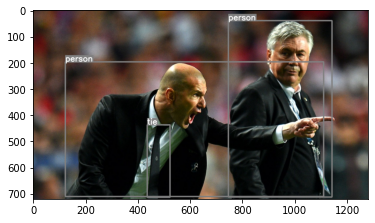

In [4]:
results = model(source='zidane.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Training a model from scratch

It is also possible, although not recommended, to train a model from scratch. 

In [5]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # Using yolov8n structure, but randomly initialized weights
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs


(225, 3157200, 3157184, 8.8575488)

#### Inference using a randomly initialized model

Let's use this model to perform inference.  Recall that this model is not pretrained.

You'll notice that the model fails to find both Zidane and Ancelotti.


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\zidane.jpg: 384x640 (no detections), 91.8ms
Speed: 2.0ms preprocess, 91.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


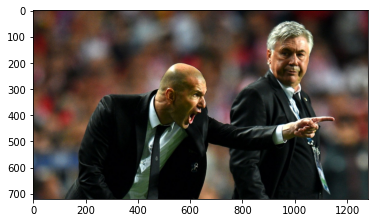

In [6]:
results = model(source='zidane.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls 
    print(c)
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Training: other considerations

Check out [https://docs.ultralytics.com/modes/train/#arguments](https://docs.ultralytics.com/modes/train/#arguments) for a list of arguments for `train` method.  Especially check out `freeze` argument:

> Freezes the first N layers of the model or specified layers by index, reducing the number of trainable parameters. Useful for fine-tuning or transfer learning.

In [7]:
from ultralytics import YOLO

use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = 'mps' # Since I am running this on Apple Silicon
epochs = 1
data = 'coco128.yaml'

# Uncomment the following to train
# This takes a while
#results = model.train(data=data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


<div style="color: magenta">

## Self-Test

At this point, please confirm that you are able to complete the following tasks:

1. Install ultralytics YOLO distribution.
2. Use pretrained YOLO model to detect objects in images/videos.
    - You should also be able to visualize the object detection results. 
3. Download COCO128 dataset and be familiar with the yaml file that describes its structure.
4. Train a YOLO model from scratch on COCO128 dataset.
    - Use the trained YOLO model to detect objects in images from the COCO128 dataset
  
</div>

## Train YOLO to detect road signs

Recall the very first lab of this course.  There you were asked to use template matching techniques to identify the stop signs in [https://www.kaggle.com/datasets/andrewmvd/road-sign-detection](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection).  The dataset is also available [here](https://drive.google.com/drive/folders/1MAv77UPChcZneJr4ik4X3i8s9AYFC2-B?usp=drive_link).  I have made it available for educational purposes.

You are now ready to use YOLO to detect road signs in this dataset.  Let's do that.  You'll need to complete the following tasks.

### Convert road-sign-detection dataset to use YOLO annotations.

Recall that road sign detection dataset annotation are stored in XML format.

Example `road0.xml`

~~~txt
<annotation>
    <folder>images</folder>
    <filename>road0.png</filename>
    <size>
        <width>267</width>
        <height>400</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>trafficlight</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>98</xmin>
            <ymin>62</ymin>
            <xmax>208</xmax>
            <ymax>232</ymax>
        </bndbox>
    </object>
</annotation>
~~~

We need to convert this into the annotation format used by YOLO.  Check the section on COCO128 dataset.

<div style="color: blue;">

#### Data pipelines

Deep learning belongs to the category of data-driven approaches.  Consequently, a big part of developing deep learning solutions is to construct efficient and highly scalable data pipelines.  Once the data pipeline is in place, it is much easier to develop deep learning models and capture their performance.

In this lab, you are asked to take the road-sign-detection dataset and transform it into a form that YOLO can understand.  The lessons learned here will be useful as you develop larger, more sophisticated deep learning models.

</div>

#### Constructing YOLO data pipeline from road-sign-detection dataset

The following code taken from [https://blog.paperspace.com/train-yolov5-custom-data/](https://blog.paperspace.com/train-yolov5-custom-data/) does just that.  It takes an XML file and outputs annotations found within as YOLO format.  The code also create txt files, one per image, to store the annotations.  This is similar to how COCO128 dataset is structured.

In [7]:
import xml.etree.ElementTree as ET

# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text

        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"trafficlight": 0,
                           "stop": 1,
                           "speedlimit": 2,
                           "crosswalk": 3}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict, rootpath='.', write_to_file=False):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    if write_to_file:
        # Name of the file which we have to save 
        save_file_name = os.path.join(rootpath, "annotations", info_dict["filename"].replace("png", "txt"))
    
        # Save the annotation to disk
        print("\n".join(print_buffer), file= open(save_file_name, "w"))
    else:
        return print_buffer 

In [8]:
xml_file = 'road0.xml'
xml_info = extract_info_from_xml(xml_file)
print('xml_info:\n', xml_info)

yolo_annotations = convert_to_yolov5(xml_info)
print('yolo_annotations:\n', yolo_annotations)

xml_info:
 {'bboxes': [{'class': 'trafficlight', 'xmin': 98, 'ymin': 62, 'xmax': 208, 'ymax': 232}], 'filename': 'road0.png', 'image_size': (267, 400, 3)}
yolo_annotations:
 ['0 0.573 0.367 0.412 0.425']


You can use the above methods to iterate through all XML files and construct the text annotation files as follows.  <p style="color: red">!!! Note that the following code will create one text file per xml file in the xml file folder. !!!</p>

In [9]:
import os
!pip install tqdm
from tqdm import tqdm

# Rootpath indicates the root folder where you have stored the road-sign-detection dataset
rootpath = "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive"

annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "xml"]
annotations.sort()

for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict, rootpath=rootpath, write_to_file=True)
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

100%|███████████████████████████████████████████████████████████████████████████████| 877/877 [00:05<00:00, 173.35it/s]


#### Check annotations

It is wise to check the annotations.  Check out the annotation code above to see how you can draw bounding boxes and class labels on the images.

In [10]:
annotations # change the xml file to txt file  

['C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road0.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road1.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road10.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road100.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road101.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road102.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\road103.txt',
 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\\annotations\\roa

#### Split data into train, validation, and test sets

The following code construct 6 lists:  

- train_images;
- train_annotations;
- val_images;
- val_annotations;
- test_images; and
- test_annotations.

Each list contain filenames. 

In [11]:
import random
import os
!pip install --quiet scikit-learn
from sklearn.model_selection import train_test_split
rootpath = "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive"
images = [os.path.join(rootpath, 'images', x) for x in os.listdir(os.path.join(rootpath, 'images'))]
annotations = [os.path.join(rootpath,'annotations', x) for x in os.listdir(os.path.join(rootpath,'annotations')) if x[-3:] == "txt"]

images.sort()
annotations.sort()

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

ValueError: Found input variables with inconsistent numbers of samples: [4, 877]

##### Moving/copying images to their respective folders

Move train, validation and test files (images and annotations) to their own directories.  For the road sign detection dataset you can use the following layout (inspired by COCO128).

~~~txt
➜  road-sign-detection tree .
.
├── images
│   ├── test
│   ├── train
│   └── val
└── labels
    ├── test
    ├── train
    └── val
~~~

This process can be easily automated using Python shell utilities package.

In [12]:
import shutil
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

<!--
The above method is able to move files as 

~~~python
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'labels/train/')
move_files_to_folder(val_annotations, 'labels/val/')
move_files_to_folder(test_annotations, 'labels/test/')
~~~
-->

In [24]:
move_files_to_folder(train_images, "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive/images/train")

In [30]:
move_files_to_folder(train_annotations, "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive/labels/train")

C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive\annotations\road260.txt


AssertionError: 

In [25]:
move_files_to_folder(test_images, "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive/images/test")

In [28]:
move_files_to_folder(test_annotations, "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive/labels/test")

In [26]:
move_files_to_folder(val_images, "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive/images/val")

In [29]:
move_files_to_folder(val_annotations, "C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Labs/Lab1/dataset/archive/labels/val")

#### Create a data (yaml) file that YOLO will use to train on the road-sign-detection dataset.

The yaml file that describes the road-sign-detection dataset will look something like

~~~
path: /path/to/Road_Sign_Dataset
train: images/train/ 
val:  images/val/
test: images/test/

nc: 4

names: ["trafficlight", "stop", "speedlimit",  "crosswalk"]
~~~

### YOLO models for road sign detection

Now you have everything that you need to train YOLO to detect road signs.

<div style="color: darkgreen">

## TO DO

1. Construct a pretrained YOLO and capture its performance on the test set without any training.
2. Construct a pretrained YOLO.  Train it for 5 epochs on the training set.  Then capture its performance on the test set.
3. Train a YOLO from scratch for 5 and 15 epochs on the training set.   Then capture its performance on the test set.
4. Construct a table that compares the performance obtained under various settings.
5. Pick a small subset of test images and show qualitative results under various settings.

Train, validation and test sets here refer to the road-sign-detection dataset.

**Important** Let's use Tiny YOLO for these experiments.

</div>

# 1. Construct a pretrained YOLO and capture its performance on the test set without any training.

In [9]:
use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = 'cuda'
epochs = 1
data = 'sign.yaml'


Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


In [10]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU
test1 = benchmark(model='yolov8n.pt', data='sign.yaml', imgsz=640, half=False, device='cpu')

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 900.3/952.8 GB disk)

Benchmarks complete for yolov8n.pt on sign.yaml at imgsz=640 (66.55s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.2               0.0005                  101.70
1             TorchScript       ✅       12.5               0.0003                  120.64
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow GraphDef       ❌        0.0                  NaN                     NaN
8         TensorFlow Lite       ❌        0.0              

In [46]:
test1

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,6.2,0.0005,132.73
1,TorchScript,✅,12.5,0.0003,166.42
2,ONNX,❌,0.0,NaN,NaN
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❌,0.0,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN


# 2. Construct a pretrained YOLO. Train it for 5 epochs on the training set. Then capture its performance on the test set.

In [17]:
import torch

torch.cuda.is_available()

False

In [20]:
from ultralytics import YOLO

use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 5
data = 'sign.yaml'

# Uncomment the following to train
# This takes a while
model5e = model.train(data=data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.31 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=sign.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab1\dataset\archive\labels

train: New cache created: C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab1\dataset\archive\labels\train.cache



val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab1\dataset\archive\labels\v

Plotting labels to runs\detect\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.7694      2.485     0.9453         28        640: 100%|██████████| 44/44 [05:07<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all         88        132      0.922      0.135      0.567      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.7858       1.42     0.9427         33        640: 100%|██████████| 44/44 [05:24<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.719      0.637      0.813      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.7628      1.274     0.9366         35        640: 100%|██████████| 44/44 [05:30<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all         88        132      0.901      0.827      0.884      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.7062       1.12     0.9322         24        640: 100%|██████████| 44/44 [05:50<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all         88        132      0.824      0.857      0.853      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      0.687       1.01     0.9193         26        640: 100%|██████████| 44/44 [05:28<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.895      0.883      0.924      0.739



5 epochs completed in 0.478 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<0


                   all         88        132      0.895      0.882      0.924      0.738
          trafficlight         88         19      0.776      0.729      0.806      0.519
                  stop         88         10      0.876        0.9      0.938      0.847
            speedlimit         88         81      0.975      0.978      0.993      0.868
             crosswalk         88         22      0.953      0.921      0.957       0.72
Speed: 1.3ms preprocess, 111.3ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs\detect\train


In [24]:
model5e

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002A83E0E7730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [11]:
test2 = benchmark(model = './runs/detect/train/weights/last.pt', data = 'sign.yaml', half=False, device = device)

Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: -1
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [43]:
test2['metrics/mAP50-95(B)']

0     0.4378
1     0.4428
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
Name: metrics/mAP50-95(B), dtype: float64

# 3. Train a YOLO from scratch for 5 and 15 epochs on the training set. Then capture its performance on the test set.

## Train for 5 epochs

In [28]:
from ultralytics import YOLO

use_pretrained = False

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 5
data = 'sign.yaml'

# Uncomment the following to train
# This takes a while
scratch_model5e = model.train(data=data, epochs=epochs, device=device);

Using a scratch model
YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.31 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=sign.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab1\dataset\archive\labels
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab1\dataset\archive\labels\v

Plotting labels to runs\detect\train2\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      3.619      5.385      4.306         28        640: 100%|██████████| 44/44 [04:43<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132   0.000211     0.0693   0.000244   4.52e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      3.294      4.743      3.876         33        640: 100%|██████████| 44/44 [04:59<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132   0.000302     0.0974   0.000317   7.86e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.882      4.217      3.364         35        640: 100%|██████████| 44/44 [05:35<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0

                   all         88        132    0.00108        0.2     0.0664     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.647      3.721      3.011         24        640: 100%|██████████| 44/44 [05:46<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<0

                   all         88        132      0.487       0.15      0.159     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.407      3.257       2.68         26        640: 100%|██████████| 44/44 [05:43<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<0

                   all         88        132      0.855      0.264      0.311      0.187



5 epochs completed in 0.469 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
YOLOv8n summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0


                   all         88        132      0.855      0.264      0.311      0.187
          trafficlight         88         19          1          0     0.0041   0.000819
                  stop         88         10      0.709        0.6      0.639      0.382
            speedlimit         88         81      0.712      0.457      0.548      0.337
             crosswalk         88         22          1          0     0.0538     0.0267
Speed: 1.7ms preprocess, 118.2ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs\detect\train2


In [ ]:
test3 = benchmark(model = './runs/detect/train2/weights/last.pt', data = 'sign.yaml', half=False, device = device)

## Train for 15 epochs

In [29]:
from ultralytics import YOLO

use_pretrained = False

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 15
data = 'sign.yaml'

# Uncomment the following to train
# This takes a while
scratch_model15e = model.train(data=data, epochs=epochs, device=device);

Using a scratch model
YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.31 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=sign.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab1\dataset\archive\labels
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab1\dataset\archive\labels\v

Plotting labels to runs\detect\train3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      3.619      5.385      4.306         28        640: 100%|██████████| 44/44 [05:02<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132   0.000211     0.0693   0.000244   4.52e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      3.278      4.715       3.85         33        640: 100%|██████████| 44/44 [05:00<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132   0.000271     0.0724   0.000291   8.02e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G        2.8      4.206      3.269         35        640: 100%|██████████| 44/44 [05:00<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132    0.00115       0.19    0.00311    0.00125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G       2.59       3.61      2.897         24        640: 100%|██████████| 44/44 [05:00<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.373     0.0802     0.0729     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G       2.26      2.979      2.501         26        640: 100%|██████████| 44/44 [04:59<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.701      0.167      0.232      0.141


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15         0G      1.661      2.603      2.081         16        640: 100%|██████████| 44/44 [04:57<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.648      0.332      0.387      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G      1.488      2.188      1.888         25        640: 100%|██████████| 44/44 [04:59<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.656      0.345      0.371       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G       1.33      1.866      1.746         19        640: 100%|██████████| 44/44 [04:57<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.911      0.348      0.444       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G      1.281      1.646      1.658         20        640: 100%|██████████| 44/44 [04:58<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.789      0.482      0.545      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G      1.205      1.509      1.605         18        640: 100%|██████████| 44/44 [04:57<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<0

                   all         88        132      0.784      0.452      0.504      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G      1.141      1.379      1.526         18        640: 100%|██████████| 44/44 [04:56<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all         88        132      0.856       0.55      0.604      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G      1.075       1.28      1.462         22        640: 100%|██████████| 44/44 [04:55<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all         88        132       0.89      0.596      0.613       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G      1.077      1.217      1.438         19        640: 100%|██████████| 44/44 [04:53<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all         88        132      0.973      0.522      0.635      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15         0G      1.013      1.162      1.403         16        640: 100%|██████████| 44/44 [04:51<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:12<0

                   all         88        132      0.909      0.574      0.655       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G      1.012      1.092      1.393         18        640: 100%|██████████| 44/44 [05:17<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:17<0

                   all         88        132      0.988      0.558      0.656      0.517



15 epochs completed in 1.306 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
YOLOv8n summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0


                   all         88        132      0.988      0.558      0.656      0.518
          trafficlight         88         19          1          0     0.0667     0.0212
                  stop         88         10          1      0.787      0.886      0.746
            speedlimit         88         81      0.968      0.901      0.969      0.798
             crosswalk         88         22      0.984      0.545      0.702      0.506
Speed: 2.1ms preprocess, 144.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train3


In [ ]:
test4 = benchmark(model = './runs/detect/train3/weights/last.pt', data = 'sign.yaml', half=False, device = device)

# 4. Construct a table that compares the performance obtained under various settings.

In [ ]:
met1 = test1['metrics/mAP50-95(B)'][:2]

In [ ]:
met2 = test2['metrics/mAP50-95(B)'][:2]

In [ ]:
met3 = test3['metrics/mAP50-95(B)'][:2]

In [ ]:
met4 = test4['metrics/mAP50-95(B)'][:2]

In [ ]:
import pandas as pd
d = {'Test1_yolov8n': met1, 'Test2_yolov8n_5epochs':met2, 'Test3_scratch_5epochs':met3,'Test4_scratch_15epochs':met4}
result = pd.DataFrame( data = d )

In [ ]:
result

In [72]:
result.to_csv('performance_metric for each model.csv')

# 5. Pick a small subset of test images and show qualitative results under various settings.

## Using pretrained v8n model to test

In [15]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
test5 = benchmark(model = 'yolov8n.pt', data='small_sign.yaml', imgsz=640, half=False, device= device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 900.3/952.8 GB disk)

Benchmarks complete for yolov8n.pt on small_sign.yaml at imgsz=640 (64.32s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.2               0.0005                  105.07
1             TorchScript       ✅       12.5               0.0003                  119.87
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow GraphDef       ❌        0.0                  NaN                     NaN
8         TensorFlow Lite       ❌        0.0        

## Using scratch model trained in 5 epochs to test

In [16]:
test6 = benchmark(model = './runs/detect/train/weights/last.pt', data = 'small_sign.yaml', half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 900.3/952.8 GB disk)

Benchmarks complete for last.pt on small_sign.yaml at imgsz=160 (41.94s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        5.9               0.4378                   17.87
1             TorchScript       ✅       11.8               0.4428                   16.20
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow GraphDef       ❌        0.0                  NaN                     NaN
8         TensorFlow Lite       ❌        0.0           

## Using scratch model trained in 15 epochs to test

In [18]:
test7 = benchmark(model = './runs/detect/train3/weights/best.pt', data = 'small_sign.yaml', half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 883.9/952.8 GB disk)

Benchmarks complete for best.pt on small_sign.yaml at imgsz=160 (42.34s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        5.9               0.2020                   19.34
1             TorchScript       ✅       11.8               0.2042                   18.01
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow GraphDef       ❌        0.0                  NaN                     NaN
8         TensorFlow Lite       ❌        0.0           

In [18]:
met5 = test5['metrics/mAP50-95(B)'][:2]
met6 = test6['metrics/mAP50-95(B)'][:2]
met7 = test7['metrics/mAP50-95(B)'][:2]


In [19]:
import pandas as pd
d2 = {'Test5_yolov8n': met5,  'Test6_scratch_5epochs':met6,'Test7_scratch_15epochs':met7}
result_2 = pd.DataFrame( data = d2 )

In [20]:
result_2.to_csv('performance_metric for each model in small test set.csv')

<div style="color: magenta;">
<h2>Jupyter notebook</h2>

Source notebook is available <a href="06-object-detection-using-yolo.ipynb">here</a>.
</div>

# Start of the group project work:

## Load the path to the car data that we will be training and testing on

In [8]:
path = 'C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml'
# change the path to your dataset destination to run it on your machine
car_data = path

In [9]:
from ultralytics.utils.benchmarks import benchmark

## In this project, we will be testing various models on the car dataset and compare how well they can detect the objects.
- Pretrained yolov8n model with coco dataset
- Pretrained yolov8n model after being trained with stop sign dataset
- scratch yolov8n model
- yolov8n model trained 5 epochs
- yolov8n model trained 15 epochs

### 1. Pretrained yolov8n model with 1 epoch 

In [25]:
from ultralytics import YOLO
import torch
use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 1
results = model.train(data=car_data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=F

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Perso
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Person-

Plotting labels to runs\detect\train10\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train10
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.581      1.999      1.434         44        640: 100%|██████████| 99/99 [15:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:12


                   all        448       3442      0.666       0.33      0.423      0.215

1 epochs completed in 0.290 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 6.2MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:49


                   all        448       3442      0.666       0.33      0.423      0.215
                   car        448       2179      0.734      0.252      0.409      0.183
                person        448       1263      0.597      0.407      0.436      0.246
Speed: 2.8ms preprocess, 193.1ms inference, 0.0ms loss, 35.7ms postprocess per image
Results saved to runs\detect\train10


In [10]:
from ultralytics.utils.benchmarks import benchmark

gp_test_1 = benchmark(model = './runs/detect/train4/weights/best.pt', data = car_data, half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 887.4/952.8 GB disk)

Benchmarks complete for best.pt on C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml at imgsz=160 (49.51s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0                0.125                   21.15
1             TorchScript       ✅       11.8                0.115                   16.98
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow Graph

### Test the model precision on a single image

### The model doesn't look to work too well as it doesn't really detect any car in the image


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000351_jpg.rf.8d52d3664bdfa079ad7a35b91ae5f54b.jpg: 640x640 (no detections), 164.0ms
Speed: 3.0ms preprocess, 164.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


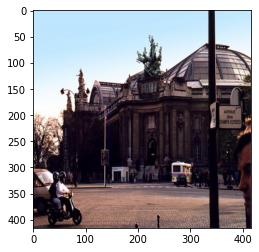

In [26]:
results = model('image_000000351_jpg.rf.8d52d3664bdfa079ad7a35b91ae5f54b.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 1 car, 1 person, 156.6ms
Speed: 5.0ms preprocess, 156.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


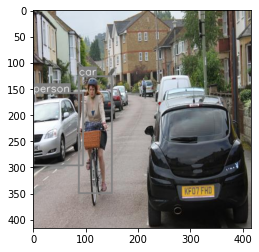

In [27]:
results = model('image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Pretrained yolov8n model with 5-15 epochs

In [29]:
from ultralytics import YOLO
import torch
use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 5
gp_model_5e = model.train(data=car_data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Perso
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Person-

Plotting labels to runs\detect\train5\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.581      1.999      1.434         44        640: 100%|██████████| 99/99 [12:11<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:35

                   all        448       3442      0.666       0.33      0.423      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.671      1.732      1.521         79        640: 100%|██████████| 99/99 [11:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:31

                   all        448       3442      0.552      0.404      0.421      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.662      1.679       1.53         45        640: 100%|██████████| 99/99 [11:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:30

                   all        448       3442      0.623      0.455      0.488      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.636      1.604      1.496         38        640: 100%|██████████| 99/99 [11:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:29

                   all        448       3442      0.612       0.49      0.519      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G       1.58      1.534      1.466         27        640: 100%|██████████| 99/99 [11:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.638      0.473       0.53      0.277



5 epochs completed in 1.127 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:10


                   all        448       3442      0.638      0.473       0.53      0.277
                person        448       2179      0.525      0.525      0.509      0.229
                   car        448       1263      0.752      0.422      0.551      0.325
Speed: 2.0ms preprocess, 139.3ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs\detect\train5


In [11]:
gp_test_2 = benchmark(model = './runs/detect/train5/weights/best.pt', data = car_data, half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 887.4/952.8 GB disk)

Benchmarks complete for best.pt on C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml at imgsz=160 (46.91s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.1605                   23.19
1             TorchScript       ✅       11.8               0.1621                   17.25
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow Graph


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 2 persons, 3 cars, 129.7ms
Speed: 5.0ms preprocess, 129.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


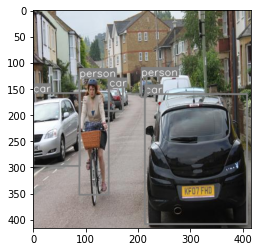

In [31]:
model = YOLO('./runs/detect/train5/weights/best.pt')
results = model('image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg')
annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### 15 epochs

In [32]:
from ultralytics import YOLO
import torch
use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 15
gp_model_15e = model.train(data=car_data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=F

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Perso
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Person-

Plotting labels to runs\detect\train6\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train6
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      1.581      1.999      1.434         44        640: 100%|██████████| 99/99 [11:53<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:36

                   all        448       3442      0.666       0.33      0.423      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      1.685      1.774      1.539         79        640: 100%|██████████| 99/99 [11:59<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:33

                   all        448       3442       0.52      0.345      0.363      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G      1.731      1.767      1.584         45        640: 100%|██████████| 99/99 [11:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:40

                   all        448       3442      0.499      0.411      0.393      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G      1.735       1.75      1.584         38        640: 100%|██████████| 99/99 [11:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:29

                   all        448       3442      0.459      0.343      0.322      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G      1.689      1.677      1.555         27        640: 100%|██████████| 99/99 [11:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.551      0.442      0.448      0.226


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15         0G      1.751       1.74      1.628         11        640: 100%|██████████| 99/99 [11:41<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.629      0.443      0.491      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G      1.743      1.647       1.62         29        640: 100%|██████████| 99/99 [11:44<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.649      0.466      0.513      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G       1.71      1.588      1.593         11        640: 100%|██████████| 99/99 [12:52<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:31

                   all        448       3442      0.646      0.499       0.53      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G      1.662      1.523      1.556         44        640: 100%|██████████| 99/99 [11:29<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.646      0.472      0.513      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G      1.641      1.483      1.544         17        640: 100%|██████████| 99/99 [11:29<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.638      0.489      0.532      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G      1.604      1.435      1.512         21        640: 100%|██████████| 99/99 [11:30<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.674      0.516      0.565      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G       1.58      1.374      1.486         35        640: 100%|██████████| 99/99 [11:28<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.676      0.541      0.579      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G      1.558      1.356      1.481         13        640: 100%|██████████| 99/99 [11:25<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.701      0.537        0.6      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15         0G      1.532      1.301      1.447         14        640: 100%|██████████| 99/99 [11:23<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.707      0.548      0.604      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G       1.48      1.259       1.42         24        640: 100%|██████████| 99/99 [11:21<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.709      0.553      0.608      0.341



15 epochs completed in 3.310 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 6.2MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:06


                   all        448       3442      0.708      0.553      0.608      0.341
                person        448       2179      0.682      0.514      0.574       0.28
                   car        448       1263      0.734      0.592      0.642      0.402
Speed: 2.1ms preprocess, 134.5ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\train6


In [12]:
gp_test_3 = benchmark(model = './runs/detect/train6/weights/best.pt', data = car_data, half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 887.4/952.8 GB disk)

Benchmarks complete for best.pt on C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml at imgsz=160 (48.55s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.1774                   23.24
1             TorchScript       ✅       11.8               0.1758                   19.17
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow Graph


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 2 persons, 6 cars, 119.7ms
Speed: 4.0ms preprocess, 119.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


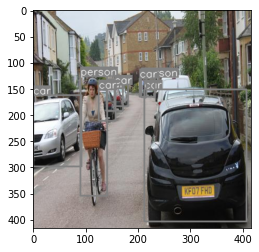

In [31]:
model = YOLO('./runs/detect/train6/weights/best.pt')
results = model('image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg')
annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Pretrained model with 50 epochs

In [38]:
from ultralytics import YOLO
import torch
use_pretrained = True

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 50
gp_model_50e = model.train(data=car_data, epochs=epochs, device=device);

Using a pretrained model
YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=F

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Perso
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Person-

Plotting labels to runs\detect\train8\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.581      1.999      1.434         44        640: 100%|██████████| 99/99 [11:21<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:33

                   all        448       3442      0.666       0.33      0.423      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.698      1.774      1.546         79        640: 100%|██████████| 99/99 [11:43<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:33

                   all        448       3442      0.459       0.38      0.337      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.76      1.798      1.599         45        640: 100%|██████████| 99/99 [11:45<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:29

                   all        448       3442      0.563      0.418      0.431        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.765      1.785      1.608         38        640: 100%|██████████| 99/99 [11:44<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.536      0.394      0.402      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.728      1.733      1.583         27        640: 100%|██████████| 99/99 [11:44<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:30

                   all        448       3442      0.494      0.381      0.375       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.703      1.697      1.582         21        640: 100%|██████████| 99/99 [11:43<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.588      0.411      0.445      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.686       1.68      1.572         34        640: 100%|██████████| 99/99 [11:42<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.584      0.445      0.474      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.659      1.625      1.555         23        640: 100%|██████████| 99/99 [11:41<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.598      0.474      0.493      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.636      1.539      1.528         30        640: 100%|██████████| 99/99 [11:45<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442      0.615      0.463      0.496      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.618      1.548      1.525         28        640: 100%|██████████| 99/99 [11:47<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442        0.6      0.496      0.516      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G       1.63      1.547       1.53         14        640: 100%|██████████| 99/99 [11:46<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442      0.633      0.486       0.52      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.618      1.526      1.525         20        640: 100%|██████████| 99/99 [11:46<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.643       0.49       0.53      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.592      1.488      1.498         17        640: 100%|██████████| 99/99 [11:48<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.646      0.484      0.527      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.579      1.477      1.492         27        640: 100%|██████████| 99/99 [11:49<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.643      0.517       0.55      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.586      1.453      1.493         65        640: 100%|██████████| 99/99 [11:47<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442       0.65      0.513      0.552      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.569      1.436      1.482         22        640: 100%|██████████| 99/99 [12:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.652      0.491      0.523      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.554       1.42      1.466         47        640: 100%|██████████| 99/99 [11:47<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.661      0.526      0.558      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G       1.54      1.383      1.455         44        640: 100%|██████████| 99/99 [11:45<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.656      0.517       0.56      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.541      1.388      1.452         19        640: 100%|██████████| 99/99 [11:43<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.637      0.516      0.551      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.533      1.374      1.458         39        640: 100%|██████████| 99/99 [11:41<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.672      0.521      0.568      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.496      1.337      1.435         21        640: 100%|██████████| 99/99 [11:43<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.678      0.516      0.565      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.517      1.367      1.449         14        640: 100%|██████████| 99/99 [11:40<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442       0.71      0.519      0.587      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.502      1.333      1.427         44        640: 100%|██████████| 99/99 [11:38<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.671      0.524      0.574      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.507      1.312      1.421         42        640: 100%|██████████| 99/99 [11:40<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.653      0.542      0.576      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.485      1.312      1.422         17        640: 100%|██████████| 99/99 [11:35<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.681      0.536      0.587       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.469      1.304      1.415         10        640: 100%|██████████| 99/99 [11:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.686      0.533      0.583      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.463      1.282      1.405         62        640: 100%|██████████| 99/99 [11:37<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.666      0.531      0.574      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.444      1.273      1.396         25        640: 100%|██████████| 99/99 [11:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.668       0.54      0.582      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.443      1.253      1.393         40        640: 100%|██████████| 99/99 [11:37<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.669      0.548       0.59      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.446       1.25      1.393         29        640: 100%|██████████| 99/99 [11:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.692      0.543        0.6      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.422      1.234      1.387         12        640: 100%|██████████| 99/99 [11:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.692      0.558      0.603      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.413      1.215       1.37         64        640: 100%|██████████| 99/99 [11:41<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442        0.7      0.543      0.596      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.409      1.203      1.365         23        640: 100%|██████████| 99/99 [11:35<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.659      0.578      0.602      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.411      1.182      1.362         43        640: 100%|██████████| 99/99 [11:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.677      0.559      0.602      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.401      1.184      1.355         36        640: 100%|██████████| 99/99 [42:21<00:00, 25.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:22

                   all        448       3442      0.711      0.552      0.609      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G       1.41      1.202      1.364         34        640: 100%|██████████| 99/99 [12:31<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:31

                   all        448       3442      0.698      0.561      0.613      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.392      1.159      1.346        104        640: 100%|██████████| 99/99 [12:47<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:35

                   all        448       3442      0.697      0.573      0.612       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.377      1.161       1.35         18        640: 100%|██████████| 99/99 [12:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:31

                   all        448       3442      0.693      0.561      0.605      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.386      1.151      1.349         46        640: 100%|██████████| 99/99 [12:21<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.711      0.562       0.61      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.385      1.149      1.347         55        640: 100%|██████████| 99/99 [11:47<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.721      0.553      0.615      0.346


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.424      1.146      1.373         11        640: 100%|██████████| 99/99 [11:23<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442        0.7      0.566      0.614      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.412      1.119      1.359         98        640: 100%|██████████| 99/99 [11:25<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.706      0.566      0.616      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.401      1.084      1.355         11        640: 100%|██████████| 99/99 [11:26<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.702      0.572      0.615      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.365      1.054      1.333         14        640: 100%|██████████| 99/99 [11:28<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.705      0.573      0.619      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.361      1.045      1.329         31        640: 100%|██████████| 99/99 [11:26<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.703      0.576      0.621       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.358       1.04      1.329          9        640: 100%|██████████| 99/99 [11:26<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.721      0.568      0.621       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.331      1.018      1.309          9        640: 100%|██████████| 99/99 [11:25<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.716      0.578      0.628      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.332      1.003      1.306         27        640: 100%|██████████| 99/99 [11:25<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.725      0.568      0.629      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.332      1.008       1.31         24        640: 100%|██████████| 99/99 [11:26<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:24

                   all        448       3442      0.715      0.575      0.631      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.318     0.9943      1.301         15        640: 100%|██████████| 99/99 [11:25<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:23

                   all        448       3442      0.705      0.591      0.632      0.359



50 epochs completed in 11.491 hours.
Optimizer stripped from runs\detect\train8\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train8\weights\best.pt, 6.2MB

Validating runs\detect\train8\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:05


                   all        448       3442      0.705      0.592      0.633      0.359
                person        448       2179       0.67       0.55      0.589      0.289
                   car        448       1263       0.74      0.635      0.676      0.429
Speed: 1.8ms preprocess, 132.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train8


In [25]:
gp_test_7 = benchmark(model = './runs/detect/train8/weights/best.pt', data = car_data, half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 887.6/952.8 GB disk)

Benchmarks complete for best.pt on C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml at imgsz=160 (44.32s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.1931                   22.26
1             TorchScript       ✅       11.8               0.1899                   16.42
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow Graph


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 2 persons, 8 cars, 135.6ms
Speed: 4.0ms preprocess, 135.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


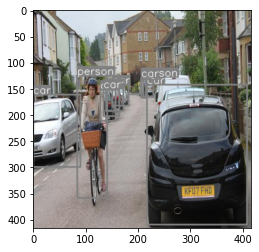

In [26]:
model = YOLO('./runs/detect/train8/weights/best.pt')
results = model('image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg')
annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### Train scratch model in 5 to 15 epochs

### 5 pochs

In [34]:
from ultralytics import YOLO
import torch
use_pretrained = False

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 5
gp_scratch_model_5e = model.train(data=car_data, epochs=epochs, device=device);

Using a scratch model
YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buff

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Perso
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Person-

Plotting labels to runs\detect\train7\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      3.752      3.698      4.073         44        640: 100%|██████████| 99/99 [11:33<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:32

                   all        448       3442    0.00211     0.0927    0.00146   0.000452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      3.245      3.423      3.458         79        640: 100%|██████████| 99/99 [11:37<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:40

                   all        448       3442     0.0164      0.183     0.0107    0.00331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      3.004      3.225      3.097         45        640: 100%|██████████| 99/99 [11:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:57

                   all        448       3442     0.0517     0.0909     0.0305    0.00818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.824      3.076      2.889         38        640: 100%|██████████| 99/99 [11:35<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:41

                   all        448       3442      0.128      0.121     0.0495     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.668      2.925      2.744         27        640: 100%|██████████| 99/99 [11:35<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:34

                   all        448       3442      0.141      0.138      0.067     0.0227



5 epochs completed in 1.108 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 6.2MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:15


                   all        448       3442      0.141      0.138      0.067     0.0227
                person        448       2179      0.141      0.122     0.0629     0.0203
                   car        448       1263      0.141      0.154      0.071      0.025
Speed: 2.1ms preprocess, 133.1ms inference, 0.0ms loss, 25.6ms postprocess per image
Results saved to runs\detect\train7


In [13]:
gp_test_4 = benchmark(model = './runs/detect/train7/weights/best.pt', data = car_data, half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 887.4/952.8 GB disk)

Benchmarks complete for best.pt on C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml at imgsz=160 (47.76s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.0189                   23.64
1             TorchScript       ✅       11.8               0.0174                   17.81
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow Graph


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 2 cars, 121.7ms
Speed: 3.0ms preprocess, 121.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


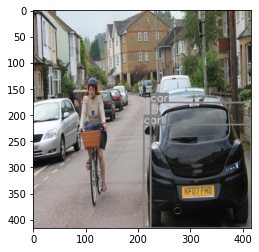

In [37]:
model = YOLO('./runs/detect/train7/weights/best.pt')
results = model('image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg')
annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

### 15 epochs

In [20]:
from ultralytics import YOLO
import torch
use_pretrained = False

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 15
gp_scratch_model_15e = model.train(data=car_data, epochs=epochs, device=device);

Using a scratch model
YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.43 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_bu

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Perso
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Person-


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train11
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15         0G      3.752      3.698      4.073         44        640: 100%|██████████| 99/99 [13:36<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:32

                   all        448       3442    0.00211     0.0927    0.00146   0.000452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15         0G      3.233      3.417      3.432         79        640: 100%|██████████| 99/99 [12:04<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:43

                   all        448       3442     0.0373     0.0603     0.0116      0.003



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15         0G      2.984      3.225      3.049         45        640: 100%|██████████| 99/99 [12:50<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:01

                   all        448       3442     0.0972     0.0755     0.0363     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15         0G      2.769       3.06      2.829         38        640: 100%|██████████| 99/99 [13:05<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:07

                   all        448       3442      0.114      0.147     0.0502     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15         0G      2.597      2.897      2.661         27        640: 100%|██████████| 99/99 [13:03<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:46

                   all        448       3442      0.155      0.148     0.0753      0.025


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15         0G      2.489      2.878      2.576         11        640: 100%|██████████| 99/99 [12:18<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:46

                   all        448       3442      0.187      0.208      0.108     0.0401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15         0G      2.419      2.708      2.512         29        640: 100%|██████████| 99/99 [12:10<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442      0.237      0.165       0.12     0.0439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15         0G       2.34      2.571      2.423         11        640: 100%|██████████| 99/99 [11:39<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:32

                   all        448       3442      0.311      0.237      0.192     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15         0G       2.31      2.495      2.372         44        640: 100%|██████████| 99/99 [11:39<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442      0.378      0.232       0.21     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15         0G      2.272      2.436      2.326         17        640: 100%|██████████| 99/99 [11:39<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.383      0.254      0.236     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15         0G      2.218      2.367      2.283         21        640: 100%|██████████| 99/99 [11:37<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.424      0.283      0.264      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15         0G      2.179      2.293      2.239         35        640: 100%|██████████| 99/99 [11:45<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.415      0.293      0.279      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15         0G      2.154      2.267      2.221         13        640: 100%|██████████| 99/99 [11:39<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.453      0.298      0.299      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15         0G      2.127      2.221      2.197         14        640: 100%|██████████| 99/99 [11:40<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.456       0.31      0.307      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15         0G       2.09      2.198      2.176         24        640: 100%|██████████| 99/99 [11:36<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:25

                   all        448       3442      0.473      0.311      0.317      0.141



15 epochs completed in 3.445 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 6.2MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:06


                   all        448       3442      0.472      0.311      0.317      0.141
                person        448       2179      0.429      0.268      0.268      0.102
                   car        448       1263      0.515      0.354      0.366       0.18
Speed: 1.7ms preprocess, 130.1ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs\detect\train11


In [21]:
gp_test_5 = benchmark(model = './runs/detect/train11/weights/best.pt', data = car_data, half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 887.7/952.8 GB disk)

Benchmarks complete for best.pt on C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml at imgsz=160 (48.14s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.0410                    23.7
1             TorchScript       ✅       11.8               0.0388                    17.7
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow Graph


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 1 person, 4 cars, 118.7ms
Speed: 3.0ms preprocess, 118.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


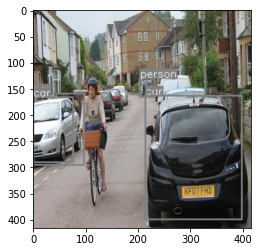

In [22]:
model = YOLO('./runs/detect/train11/weights/best.pt')
results = model('image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg')
annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

Train for 15 epochs, the model can actually detect car cut off from the image and car from afar|

## Let's try to train in long epochs

### 50 epochs 

In [21]:
use_pretrained = False

if use_pretrained:
    print('Using a pretrained model')
    model = YOLO('yolov8n.pt')  # load a pretrained model
else:
    print('Using a scratch model')
    model = YOLO('yolov8n.yaml') # load a scratch model

model.info()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 50
gp_scratch_model_50e = model.train(data=car_data, epochs=epochs, device=device);

Using a scratch model
YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buf

train: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Perso
val: Scanning C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Course project\dataset\Car-Person-

Plotting labels to runs\detect\train9\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.752      3.698      4.073         44        640: 100%|██████████| 99/99 [11:45<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:34

                   all        448       3442    0.00211     0.0927    0.00146   0.000452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      3.236      3.424      3.434         79        640: 100%|██████████| 99/99 [11:52<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:45

                   all        448       3442     0.0172     0.0917    0.00979    0.00276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.982      3.213      3.046         45        640: 100%|██████████| 99/99 [11:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:36

                   all        448       3442     0.0938     0.0461     0.0264    0.00706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.785      3.072       2.83         38        640: 100%|██████████| 99/99 [11:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:48

                   all        448       3442     0.0935      0.118      0.038     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.606      2.903       2.66         27        640: 100%|██████████| 99/99 [12:08<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:55

                   all        448       3442      0.127      0.241     0.0837     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      2.491      2.818      2.552         21        640: 100%|██████████| 99/99 [13:53<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:02

                   all        448       3442      0.219      0.188      0.102     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      2.393      2.725      2.462         34        640: 100%|██████████| 99/99 [14:30<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:04

                   all        448       3442      0.176      0.189     0.0924     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      2.317      2.623      2.382         23        640: 100%|██████████| 99/99 [15:19<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:01

                   all        448       3442      0.315       0.22      0.168     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      2.252      2.478      2.307         30        640: 100%|██████████| 99/99 [15:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:42

                   all        448       3442      0.337       0.24      0.195     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      2.217      2.465      2.267         28        640: 100%|██████████| 99/99 [14:16<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:48

                   all        448       3442      0.353      0.263      0.221     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      2.175      2.425      2.226         14        640: 100%|██████████| 99/99 [15:34<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:05

                   all        448       3442      0.359      0.262       0.24     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      2.163       2.38      2.207         20        640: 100%|██████████| 99/99 [13:17<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:32

                   all        448       3442      0.377      0.285      0.249        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      2.131       2.33       2.16         17        640: 100%|██████████| 99/99 [12:00<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:29

                   all        448       3442      0.388      0.274      0.248      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      2.096      2.271       2.13         27        640: 100%|██████████| 99/99 [11:55<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:31

                   all        448       3442      0.414      0.284      0.265      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      2.087      2.244       2.11         65        640: 100%|██████████| 99/99 [11:54<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:31

                   all        448       3442      0.434      0.291       0.28      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      2.073      2.199      2.094         22        640: 100%|██████████| 99/99 [11:56<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:30

                   all        448       3442      0.474      0.312      0.325      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      2.052      2.196      2.071         47        640: 100%|██████████| 99/99 [11:53<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.467      0.321      0.314       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      2.021      2.148      2.042         44        640: 100%|██████████| 99/99 [11:51<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.482      0.332       0.34      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      2.012      2.116      2.023         19        640: 100%|██████████| 99/99 [11:52<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:29

                   all        448       3442      0.503      0.308      0.327      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.999      2.127      2.025         39        640: 100%|██████████| 99/99 [11:58<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.485      0.323      0.335      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.976       2.08      2.013         21        640: 100%|██████████| 99/99 [11:51<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:28

                   all        448       3442      0.508      0.337      0.352      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.969      2.093      2.001         14        640: 100%|██████████| 99/99 [11:51<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442      0.487      0.333       0.34      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.966      2.048      1.979         44        640: 100%|██████████| 99/99 [12:14<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:54

                   all        448       3442      0.532      0.351      0.371      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.957      2.029      1.972         42        640: 100%|██████████| 99/99 [15:07<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:43

                   all        448       3442      0.521       0.34      0.361      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.928      2.028      1.965         17        640: 100%|██████████| 99/99 [17:31<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:51

                   all        448       3442      0.516      0.361      0.372      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.921      2.012      1.954         10        640: 100%|██████████| 99/99 [15:00<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:51

                   all        448       3442      0.554       0.35      0.385       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.898      1.979      1.942         62        640: 100%|██████████| 99/99 [16:25<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:02

                   all        448       3442      0.537      0.374      0.401      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.889      1.972      1.928         25        640: 100%|██████████| 99/99 [13:19<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:30

                   all        448       3442      0.516      0.362      0.383      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.884      1.939      1.932         40        640: 100%|██████████| 99/99 [12:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:31

                   all        448       3442       0.54      0.376      0.401      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.896      1.931      1.923         29        640: 100%|██████████| 99/99 [11:58<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:29

                   all        448       3442      0.574      0.365      0.404      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.867      1.925      1.915         12        640: 100%|██████████| 99/99 [11:57<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:29

                   all        448       3442      0.532      0.375      0.398      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.847      1.906      1.889         64        640: 100%|██████████| 99/99 [11:52<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442      0.558       0.39      0.422      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G       1.85      1.883      1.891         23        640: 100%|██████████| 99/99 [11:51<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.561      0.385      0.419      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.857      1.874      1.891         43        640: 100%|██████████| 99/99 [11:48<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:27

                   all        448       3442       0.57      0.399      0.429      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.841      1.869      1.881         36        640: 100%|██████████| 99/99 [11:50<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:26

                   all        448       3442      0.588      0.398      0.436      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.848      1.863      1.878         34        640: 100%|██████████| 99/99 [12:02<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:48

                   all        448       3442      0.561      0.414      0.437      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.824      1.836      1.854        104        640: 100%|██████████| 99/99 [15:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:49

                   all        448       3442      0.573      0.394      0.425       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.819      1.833      1.864         18        640: 100%|██████████| 99/99 [15:05<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:53

                   all        448       3442      0.577      0.419      0.448       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.823       1.82      1.858         46        640: 100%|██████████| 99/99 [15:13<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:38

                   all        448       3442      0.606      0.408      0.451      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.817      1.823       1.85         55        640: 100%|██████████| 99/99 [14:37<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:39

                   all        448       3442      0.577      0.419      0.452      0.224


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G       1.86      1.845      1.904         11        640: 100%|██████████| 99/99 [15:48<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:50

                   all        448       3442       0.58      0.422      0.448      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.837      1.792      1.887         98        640: 100%|██████████| 99/99 [14:37<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:51

                   all        448       3442      0.597      0.418      0.452      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.832      1.744      1.872         11        640: 100%|██████████| 99/99 [15:12<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:53

                   all        448       3442      0.602      0.417      0.461      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.801      1.724      1.856         14        640: 100%|██████████| 99/99 [15:12<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:53

                   all        448       3442      0.605      0.422      0.462      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.796      1.718      1.844         31        640: 100%|██████████| 99/99 [15:17<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:54

                   all        448       3442      0.596      0.439      0.462       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.792      1.729      1.856          9        640: 100%|██████████| 99/99 [15:13<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:54

                   all        448       3442      0.609      0.439      0.473      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.774      1.696       1.84          9        640: 100%|██████████| 99/99 [15:34<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:51

                   all        448       3442       0.59       0.44      0.469       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G       1.78      1.688      1.825         27        640: 100%|██████████| 99/99 [15:25<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [02:03

                   all        448       3442      0.603      0.443      0.477      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.785      1.678      1.829         24        640: 100%|██████████| 99/99 [16:00<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:56

                   all        448       3442        0.6      0.448      0.479      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.756      1.675      1.819         15        640: 100%|██████████| 99/99 [14:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:36

                   all        448       3442      0.603      0.452      0.479      0.247



50 epochs completed in 12.743 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 6.2MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.9.13 torch-2.0.0+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:17


                   all        448       3442        0.6      0.453      0.479      0.247
                     1        448       2179      0.559      0.397      0.427      0.178
                     2        448       1263      0.642      0.509      0.531      0.316
Speed: 2.1ms preprocess, 155.1ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs\detect\train9


In [16]:
gp_test_6 = benchmark(model = './runs/detect/train9/weights/best.pt', data = car_data, half=False, device = device)

Setup complete ✅ (12 CPUs, 15.9 GB RAM, 887.4/952.8 GB disk)

Benchmarks complete for best.pt on C:/Users/choun/Documents/Winter 2024 courses/CSCI4220- Computer Vision/Course project/dataset/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml at imgsz=160 (49.74s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        6.0               0.0945                   25.43
1             TorchScript       ✅       11.8               0.0903                   18.25
2                    ONNX       ❌        0.0                  NaN                     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❌        0.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ❌        0.0                  NaN                     NaN
7     TensorFlow Graph


image 1/1 C:\Users\choun\Documents\Winter 2024 courses\CSCI4220- Computer Vision\Labs\Lab4\image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg: 640x640 2 1s, 5 2s, 146.6ms
Speed: 5.0ms preprocess, 146.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


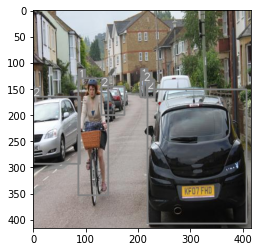

In [17]:
model = YOLO('./runs/detect/train9/weights/best.pt')
results = model('image_000000459_jpg.rf.8350c0cbc5c5b66300e54088067bc870.jpg')
annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    annotator.box_label(b, model.names[int(c)])

plt.imshow(annotator.result())

In [28]:
met1 = gp_test_1['metrics/mAP50-95(B)'][:2] # pretrained model train in 1 epoch
met2 = gp_test_2['metrics/mAP50-95(B)'][:2] # pretrained model train in 5 epoch
met3 = gp_test_3['metrics/mAP50-95(B)'][:2] # pretrained model train in 15 epoch
met4 = gp_test_4['metrics/mAP50-95(B)'][:2] # scratch model train in 5 epochs
met5 = gp_test_5['metrics/mAP50-95(B)'][:2] # scratch model train in 15 epochs
met6 = gp_test_6['metrics/mAP50-95(B)'][:2] # scratch model train in 50 epochs
met7 = gp_test_7['metrics/mAP50-95(B)'][:2] # pretrained model train in 50 epoch

In [29]:
import pandas as pd
d3 = {'pretrained_test1_1epoch':met1, 'pretrained_test2_5epoch':met2,'pretrained_test3_15epoch':met3, 
      'pretrained_test4_50epoch':met7,'scratch_test5_5epoch':met4, 'scratch_test6_15epoch':met5,'scratch_test7_50epoch':met6 }
result_df = pd.DataFrame( data = d3 )

In [30]:
result_df.to_csv('performance metric for each model in car dataset.csv')

<center>
    <tr>
    <td><img src="ontario-tech-univ-logo.png" width="25%"></img></td>
    </tr>
</center>